# <h1 style="background-color:Pink;"> <font size="15"> <b> <font color='black'> <center> Seminar

## TABLE OF CONTENT
### <b> <a href='#chapter1'> I. Import and Data Processing </a>

    

### <b> <a href='#chapter2'> II. Exploration and Visualization </a> 
    
    
    
### <b> <a href='#chapter4'> III. Modelling - Prediction </a>


# I. Import and Data Processing

In [208]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

import os
import re

from sklearn import datasets
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder

from PIL import Image
import requests
import urllib
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option('display.float_format', '{:.2f}'.format)

In [210]:
#Mobile Strategy Games Dataframe
mo_stra_games = pd.read_csv('/Users/dinhngocmai/Documents/Seminar WS2122/appstore_games.csv')
mo_stra_games
#Create a copy and check the first 2 lines of data
df = mo_stra_games.copy()
df.head(2)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.00,3553.00,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.50,284.00,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018


[Columns information:](udf_0)
- URL: The URL
- ID: The assigned ID
- Name: The name of game
- Subtitle: The secondary text under the name
- Icon: URL 512px x 512px jpg
- Average User Rating: Rounded to nearest .5, requires at least 5 ratings
- User Rating Count: Number of ratings internationally, null means it is below 5
- Price: Price in USD
- In-app Purchases: Prices of available in-app purchases
- Description: App description
- Developer: App developer
- Age Rating: Either 4+, 9+, 12+ or 17+
- Languages: ISO2A language codes
- Size: Size of the app in bytes
- Primary Genre: Main genre
- Genres: Genres of the app
- Original Release Date: When it was released
- Current Version Release Date: When it was last updated

In [211]:
#Check dataset info by feature
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("----------------------------------------------------")
print(df.info())

Number of rows: 17007
Number of columns: 18
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating            

[The set has:](udf_0)

In [212]:
# Categorical Data
cat = [e for e in df.columns if df[e].dtypes == 'object']
cat

['URL',
 'Name',
 'Subtitle',
 'Icon URL',
 'In-app Purchases',
 'Description',
 'Developer',
 'Age Rating',
 'Languages',
 'Primary Genre',
 'Genres',
 'Original Release Date',
 'Current Version Release Date']

In [213]:
# Numerical data
num = [a for a in df.columns if df[a].dtypes == 'float']
num

['Average User Rating', 'User Rating Count', 'Price', 'Size']

In [216]:
#Check duplicate rows based on ID
duplicate = df[df.duplicated('ID')]
print("Duplicate Rows based on ID :")
duplicate.head(1)

Duplicate Rows based on ID :


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
16,https://apps.apple.com/us/app/awele-oware-manc...,289217958,Awele/Oware - Mancala HD,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.00,112.00,0.00,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",122826752.00,Games,"Games, Strategy, Board",31/08/2008,6/04/2015


In [217]:
#Drop duplicates in ID columns
df = df.drop_duplicates(subset= ['ID'], keep='first')
#df.head(1)

In [218]:
print("Number of rows:", df.shape[0])
# The set has 160 Duplications.

Number of rows: 16847


In [219]:
#Check for null values
df.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11635
Icon URL                            0
Average User Rating              9359
User Rating Count                9359
Price                              24
In-app Purchases                 9232
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

- Missing values in 6 Columns: Average User Rating, User Rating Count, Price, In-app Purchases, Languages, Size

In [220]:
#Rename some specific columns
df.rename(columns = {'Average User Rating':'User_Rating_Avg','User Rating Count': 'User_Rating_Count', 
                     'In-app Purchases':'In_App_Purchases', 'Age Rating': 'Age_Rating', 'Primary Genre': 'Primary_Genre', 
                     'Icon URL': 'Icon_Url', 'Original Release Date': 'Original_Release_Date',
                     'Current Version Release Date': 'Current_Release_Date'}, inplace = True) 
df.tail(1)

,URL,ID,Name,Subtitle,Icon_Url,User_Rating_Avg,User_Rating_Count,Price,In_App_Purchases,Description,Developer,Age_Rating,Languages,Size,Primary_Genre,Genres,Original_Release_Date,Current_Release_Date
17006,https://apps.apple.com/us/app/the-three-kingdo...,1475076711,The Three Kingdoms :Bomb,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,nan,nan,0.00,NaN,The protagonist uses the method of placing a b...,ming bo tang,4+,"EN, ZH",22952960.00,Games,"Games, Strategy, Puzzle",2/08/2019,2/08/2019


In [221]:
#Drop games that has no rating
df = df[pd.notnull(df['User_Rating_Avg'])]

In [222]:
#df.In_App_Purchases=df.In_App_Purchases.fillna(0)
df.Languages=df.Languages.fillna('EN')
#df.Subtitle=df.Subtitle.fillna('leer')
df.isnull().sum()

URL                         0
ID                          0
Name                        0
Subtitle                 4789
Icon_Url                    0
User_Rating_Avg             0
User_Rating_Count           0
Price                       0
In_App_Purchases         2899
Description                 0
Developer                   0
Age_Rating                  0
Languages                   0
Size                        0
Primary_Genre               0
Genres                      0
Original_Release_Date       0
Current_Release_Date        0
dtype: int64

In [223]:
#we still need to tweak a few more things.
#size in MB
df['Size'] = round(df['Size']/1000000, 1)
#df.head(2)

In [224]:
df['Original_Release_Year'] = df['Original_Release_Date'].str.extract(r'\b(\w+)$')
df['Current_Release_Year'] = df['Current_Release_Date'].str.extract(r'\b(\w+)$')
#df.head(2)

In [225]:
df['Age_Rating'] = df['Age_Rating'].str.replace('+','').astype(int)
#df.head(2)

In [226]:
#Final Data has:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 7488
Number of columns: 20


In [227]:
df.describe()

,ID,User_Rating_Avg,User_Rating_Count,Price,Age_Rating,Size
count,7488.00,7488.00,7488.00,7488.00,7488.00,7488.00
mean,944327343.82,4.06,3306.24,0.57,6.88,151.57
std,333571894.64,0.75,42515.78,2.42,3.78,255.95
min,284921427.00,1.00,5.00,0.00,4.00,0.20
25%,646307145.75,3.50,12.00,0.00,4.00,30.50
50%,980002724.50,4.50,46.00,0.00,4.00,79.30
75%,1211851404.00,4.50,307.25,0.00,9.00,177.22
max,1474461379.00,5.00,3032734.00,139.99,17.00,4005.60


# II. Exploration and Visualization

### 1. Relationship between Average User Rating and User Rating Count

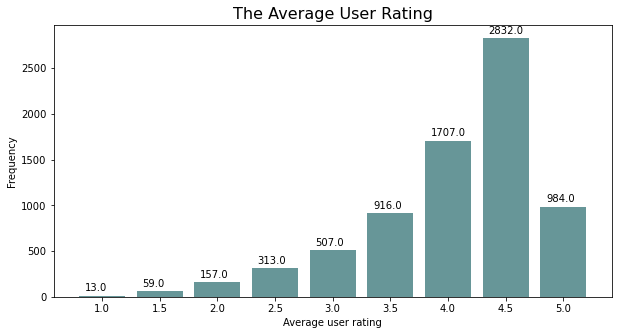

In [228]:
#Visualization of the Average User Rating
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df,x='User_Rating_Avg', color='cadetblue')
ax.set_xlabel('Average user rating')
ax.set_ylabel('Frequency')
ax.plot()
plt.title('The Average User Rating', fontsize = 16)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

According to the chart, the largest rating count - consisting of half of reviews - in top-rated games has a 4.5 average rating with 4.0 as distant second. Conversely, rating 5.0 does not have the largest count of reviews among top-rated games. Gamers seems are not really strict since the lowest star (1 star) they have given was very small, only 14 times recorded.

### 2. The TOP 5 of games that have the highest user rating count

In [257]:
most_popular_game = df.sort_values(by='User_Rating_Count', ascending=False)[['Name', 'Price','In_App_Purchases', 'User_Rating_Avg', 'Size', 'User_Rating_Count', 'Icon_Url']].head(5)
most_popular_game.iloc[:, 0:-1]

,Name,Price,In_App_Purchases,User_Rating_Avg,Size,User_Rating_Count
1378,Clash of Clans,0.00,"4.99, 9.99, 19.99, 0.99, 4.99, 0.99, 49.99, 99...",4.50,161.20,3032734.00
7187,Clash Royale,0.00,"4.99, 0.99, 9.99, 19.99, 9.99, 4.99, 0.99, 19....",4.50,145.10,1277095.00
13414,PUBG MOBILE,0.00,"0.99, 9.99, 0.99, 9.99, 24.99, 4.99, 2.99, 99....",4.50,2384.10,711409.00
1921,Plants vs. Zombies\u2122 2,0.00,"4.99, 2.99, 9.99, 9.99, 4.99, 3.99, 3.99, 1.99...",4.50,120.80,469562.00
8139,Pok\xe9mon GO,0.00,"0.99, 4.99, 9.99, 19.99, 39.99, 99.99",3.50,281.50,439776.00


The 5 most popular strategy mobile games based on gamers rating count are:

1. Clash of Clans with over 3 million gamers rating
2. Clash royale with 1.2 million gamers rating
3. PUBG mobile with 7 hundred thousand rating counted
4. Plants vs. Zomebies with nearly 4.7 hundred thousand rating recorded
5. Pokemon GO with nearly 4.4 hundred thousand rating counted

In Top 5 sind alle kostenfrei mit kleinen Speichergröße.

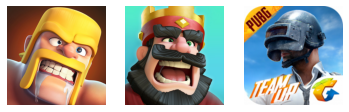

In [230]:
#Let's see how they look!

plt.figure(figsize=(6,3))
plt.subplot(131)
image = Image.open(urllib.request.urlopen(most_popular_game.iloc[0,-1]))
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
image = Image.open(urllib.request.urlopen(most_popular_game.iloc[1,-1]))
plt.imshow(image)
plt.axis('off')

plt.subplot(133)
image = Image.open(urllib.request.urlopen(most_popular_game.iloc[2,-1]))
plt.imshow(image)
plt.axis('off')

plt.show()

(-0.5, 511.5, 511.5, -0.5)

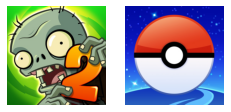

In [231]:
plt.subplot(131)
image = Image.open(urllib.request.urlopen(most_popular_game.iloc[3,-1]))
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
image = Image.open(urllib.request.urlopen(most_popular_game.iloc[4,-1]))
plt.imshow(image)
plt.axis('off')

### 3. Relationship between Average User Rating, User Rating Count and Price

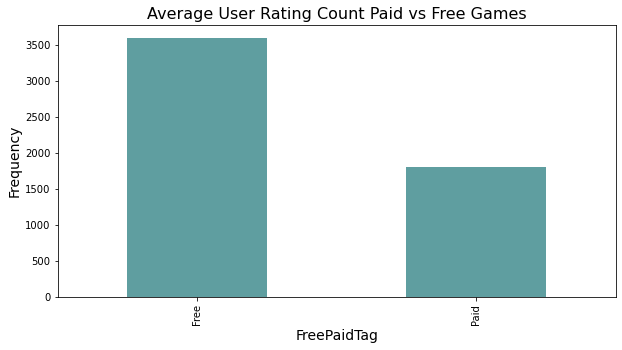

In [233]:
#Average User Rating Count Paid vs Free Games
df1=df.copy()

df1['FreePaidTag']  = ["Free" if i == 0 else "Paid" for i in df1.Price]

plt.figure(figsize=(10,5))
df1.groupby(['FreePaidTag'])['User_Rating_Count'].mean().plot.bar(color=["cadetblue","cadetblue"])
plt.xlabel('FreePaidTag', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title("Average User Rating Count Paid vs Free Games", fontsize=16)
plt.show()

The chart indicates that free games have user-rating counts 2 times higher than paid games on average. In this case, we are witnessing a caught-22 situation: That mobile users love using free apps and download free games lead to the chance for the app to be pushed to the top of the searching results, therefore more other users can see them and download them too.

There are actually four types of game monetization criteria:

    - 100% Free
    - Free, In-App Purchases
    - Paid
    - Paid, In-App Purchases

In [234]:
df_preis = df.drop(['Age_Rating','ID','URL','Developer','Subtitle','Icon_Url','Description','Languages','Primary_Genre','Genres','Original_Release_Date',
                    'Current_Release_Date', 'Original_Release_Year', 'Current_Release_Year'], axis = 1)

In [235]:
df_preis['Monetization'] = 'Free'
df_preis.loc[(df_preis['Price'] == 0) & (pd.notnull(df_preis['In_App_Purchases'])), 'Monetization'] = 'Free, In-App Purchases'
df_preis.loc[(df_preis['Price'] > 0) & (pd.isnull(df_preis['In_App_Purchases'])), 'Monetization'] = 'Paid'
df_preis.loc[(df_preis['Price'] > 0) & (pd.notnull(df_preis['In_App_Purchases'])), 'Monetization'] = 'Paid, In-App Purchases'

df_preis.head()

,Name,User_Rating_Avg,User_Rating_Count,Price,In_App_Purchases,Size,Monetization
0,Sudoku,4.00,3553.00,2.99,NaN,15.90,Paid
1,Reversi,3.50,284.00,1.99,NaN,12.30,Paid
2,Morocco,3.00,8376.00,0.00,NaN,0.70,Free
3,Sudoku (Free),3.50,190394.00,0.00,NaN,21.60,Free
4,Senet Deluxe,3.50,28.00,2.99,NaN,34.70,Paid


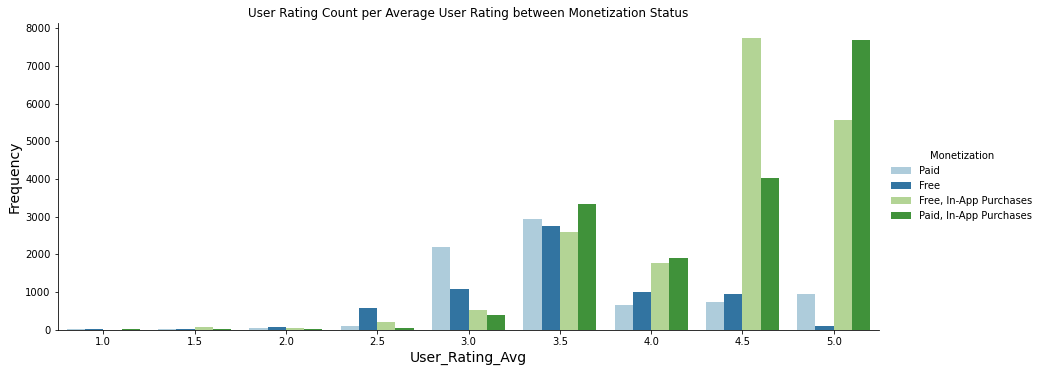

In [236]:
sns.catplot(data=df_preis, x='User_Rating_Avg', y='User_Rating_Count', kind= 'bar', hue='Monetization',
            legend_out=True, ci=None, palette='Paired', aspect=2.5)
plt.xlabel('User_Rating_Avg', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title("User Rating Count per Average User Rating between Monetization Status")

plt.show()


From this we can learn that applications that are free but have in-app purchases dominate the Mobile Game market. 
In app purchases don't have much of an impact on user rating average.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



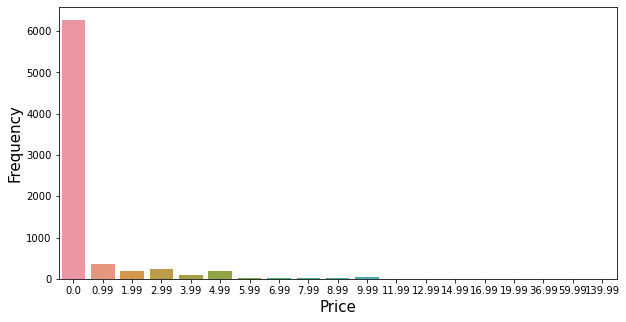

In [237]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['Price'])
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('Price', fontsize = 15)
plt.show()

In this case, once again we have a chance to confirm how big of the number of free mobiles games were used. Specifically, over 14000 mobiles games were recorded being played and the number significantly droped when people have to pay for the app, even $0.99.

In [238]:
price_range = df["Price"].dropna().map(lambda x: "p=0" if x == 0.00 else("0.99<p<4.99" if 0.99 <= x <= 4.99 else("5.99<p<19.99" if 5.99 <= x <= 19.99 else "p>19.99")))
price_range.value_counts()

p=0             6269
0.99<p<4.99     1079
5.99<p<19.99     137
p>19.99            3
Name: Price, dtype: int64

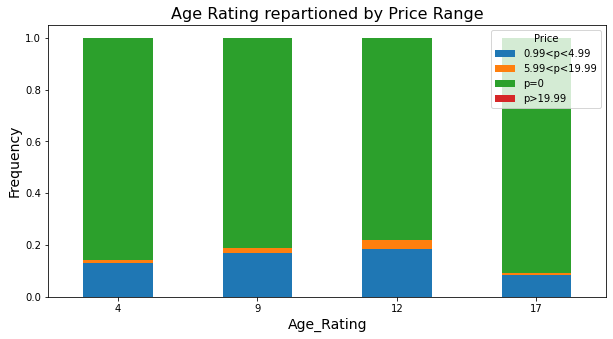

In [239]:
agerating_pricerange = pd.crosstab(df["Age_Rating"], price_range, normalize=0)
agerating_pricerange.plot.bar(stacked=True, figsize=(10,5))
plt.xticks(rotation=0)
plt.xlabel('Age_Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title("Age Rating repartioned by Price Range", fontsize = 16)
plt.show()

This stacked chart shows the relationship between age rating and price range of mobile games. There are three main price range: Low Price from 0.99 to 4.99, Medium Price from 5.99 to 19.99 and the others belong to High Price range. Obviously, free games accounted for most of figures in all age rating sections. Games that are charged in Low Price range had more chance to be used, especially with the 12+ games, followed by 9+ games. Though the Medium Price range occupied really small figures, it is still higher than High Price which is only exist in 9+ games column.

### 4. Relationship between Average User Rating and Age Rating

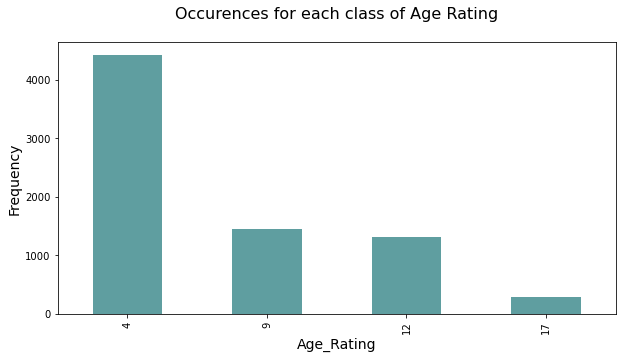

In [241]:
plt.figure(figsize=(10,5))
df['Age_Rating'].value_counts().plot.bar(color = "cadetblue")
plt.xlabel('Age_Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title("Occurences for each class of Age Rating\n", fontsize=16)
plt.show()

Information:
- 4+: Contains no objectionable material.
- 9+: May contain content unsuitable for children under the age of 9.
- 12+: May contain content unsuitable for children under the age of 12.
- 17+: May contain content unsuitable for children under the age of 17.
- Apps rated 17+ are not allowed to be purchased by children.

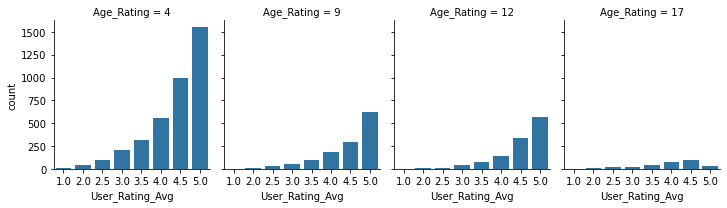

In [242]:
g = sns.FacetGrid(df, col="Age_Rating", height=3, aspect=.85)
g.map_dataframe(sns.countplot, 'User_Rating_Avg')

These charts show more details of average user rating related to the age rating. The age rating 9+ and 12+ have quite similar structures. At the same time, the rates of 4+ games take many rates with high stars, the 5 stars even reached 1600 rates, which is 2.6 times higher than 5 stars of 9+ and 12+ games, 32 times higher than 5 stars recorded of 17+ games.

### 5. Relationship between Size and Price

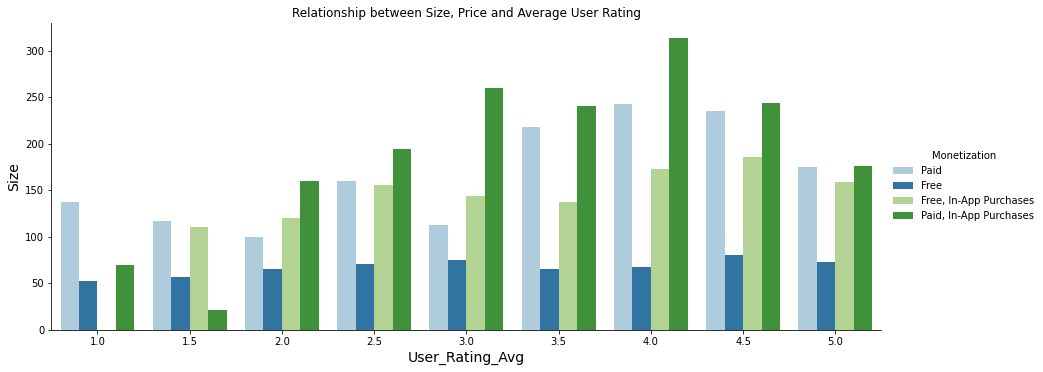

In [243]:
sns.catplot(data=df_preis, x='User_Rating_Avg', y='Size', kind= 'bar', hue='Monetization',
            legend_out=True, ci=None, aspect=2.5, palette='Paired')
plt.xlabel('User_Rating_Avg', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.title("Relationship between Size, Price and Average User Rating")

plt.show()


Price doesn't have much effect on average user rating. Many paid games are still highly rated.
The smaller price is, the smaller size a game was create and vice versa. It is reasonable because there would be not many game developer created large size of mobile game for free since they have to pay quite a lot for storing the game on the Apple Store.

### 6. Genres

In [244]:
df['Primary_Genre'].value_counts()

Games                7220
Entertainment          92
Education              46
Utilities              44
Sports                 23
Reference              18
Productivity            8
Finance                 8
Book                    5
Lifestyle               4
Stickers                3
Social Networking       3
Music                   3
Health & Fitness        2
News                    2
Business                2
Food & Drink            1
Travel                  1
Medical                 1
Navigation              1
Shopping                1
Name: Primary_Genre, dtype: int64

The Games Genre is the primary genre that appeared most frequently with over 16000 strategy mobile games in the dataset. Education and Entertainment are two genres that the number of them can be seen on the charts, but the figures were far from compared to Games.

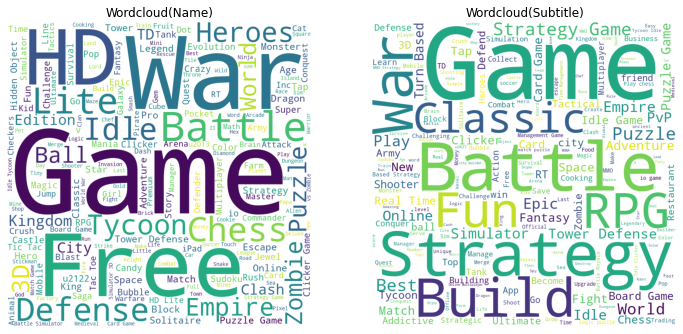

In [245]:
#Chekc the frequency of Strategy Mobile Games' Genres
fig, ax = plt.subplots(1, 2, figsize=(12,24))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Name']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Subtitle'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Subtitle)')
plt.show()

- As for the Name, the left tag cloud image represent the frequency of genres named Game, Free, War and Battle.
- When it comes to Subtitle, those words that are searched the most are Game, Battle, Puzzle, CLassic. Besides, it is obviously to see Strategy, Build and War 

### 7. Languages

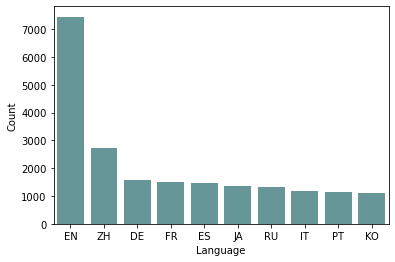

In [246]:
Languages = pd.DataFrame(df['Languages'].str.split(', ',expand=True))
Languages = pd.DataFrame(Languages.values.ravel(), columns = ["Languages"])
Languages = pd.DataFrame(Languages['Languages'].value_counts().reset_index())
Languages.columns = ['Language', 'Count']
sns.barplot(x="Language", y="Count", color='cadetblue', data=Languages.head(10))

English has the highest occurrence since over 16000 games are supported by this international language while Chinese takes the second position with 5000 games. The range from 2000 to 4000 language supporting of strategy mobile games including many other languages such as Germany, France, Spain, etc.

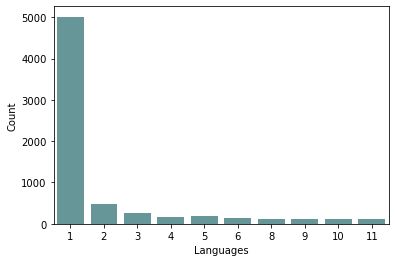

In [247]:
multi = df['Languages'].str.count(r', ') + 1
multi_lingual = pd.DataFrame(multi.value_counts().reset_index())

multi_lingual.columns = ['Languages', 'Count']

sns.barplot(x="Languages", y="Count",color='cadetblue', data=multi_lingual.head(10));

There are 12566 games over the total 17007 (accounted for 73.9%) that only support a single language while strategy mobile games supporting two languages witness a drastic drop to 1102 of 17007 (only 6.5%).

### 8. Growth of Mobile Strategy Games Market over the years

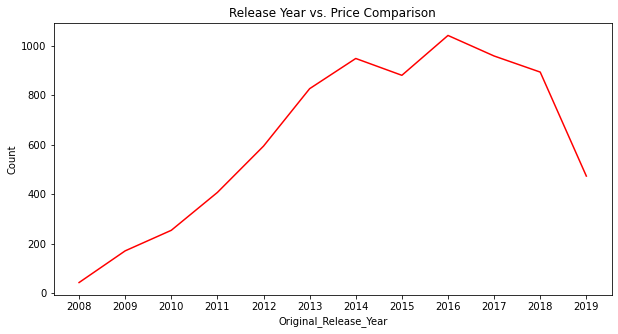

In [251]:
df_year = df.groupby(by=df['Original_Release_Year']).count()
df_year.head(2)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax1 = sns.lineplot(x=df_year.index, y='Price', data=df_year, color='red')
ax1.set_ylabel('Count')

plt.title('Release Year vs. Price Comparison')
plt.show()

We can observe that there is indeed a growth in the number of applications produced every year. Keep in mind that the visualization above is taken from a DataFrame which I have filtered. If we use a DataFrame from a dataset, of course the number will be greater, and will not experience a drastic decrease in applications that have just been produced in 2018-2019. But from this visualization we can learn that there is saturation of the Mobile Games market.


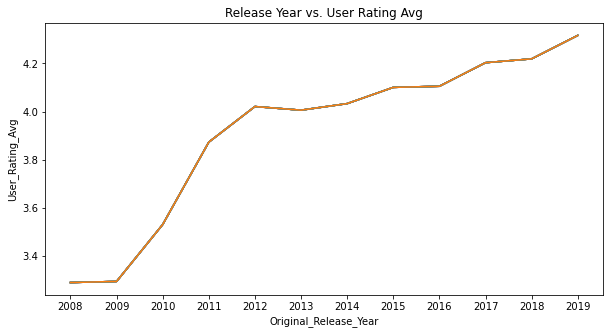

In [252]:
df_release = df.groupby('Original_Release_Year')['User_Rating_Avg'].mean().reset_index()


fig, ax = plt.subplots(figsize=[10, 5])

for i in df_release["Original_Release_Year"]:
    sns.lineplot(
        x=groupedByYear_df.index, 
        y=df_release["User_Rating_Avg"]
    )

plt.title('Release Year vs. User Rating Avg')
plt.show()

In [253]:
df_release_current = df.groupby('Current_Release_Year')['User_Rating_Avg'].mean().reset_index()
df_diff_release = df_release
df_diff_release['User_Rating_Avg'] = df_release['User_Rating_Avg'] - df_release_current['User_Rating_Avg']
df_diff_release.columns = ['Year', 'Difference']
print(df_diff_release)

    Year  Difference
0   2008        0.39
1   2009        0.47
2   2010        0.40
3   2011        0.39
4   2012        0.24
5   2013        0.21
6   2014        0.20
7   2015        0.13
8   2016        0.14
9   2017        0.09
10  2018        0.13
11  2019        0.04


There is a positive difference when I deduct the average score by the current version release date from the average score by original release date. This supports that a company should constantly update and improve its product to maintain its competitive position.
If an application is improved and updated on a regular basis, the average customer score will be higher.

### 9. Scatterplot

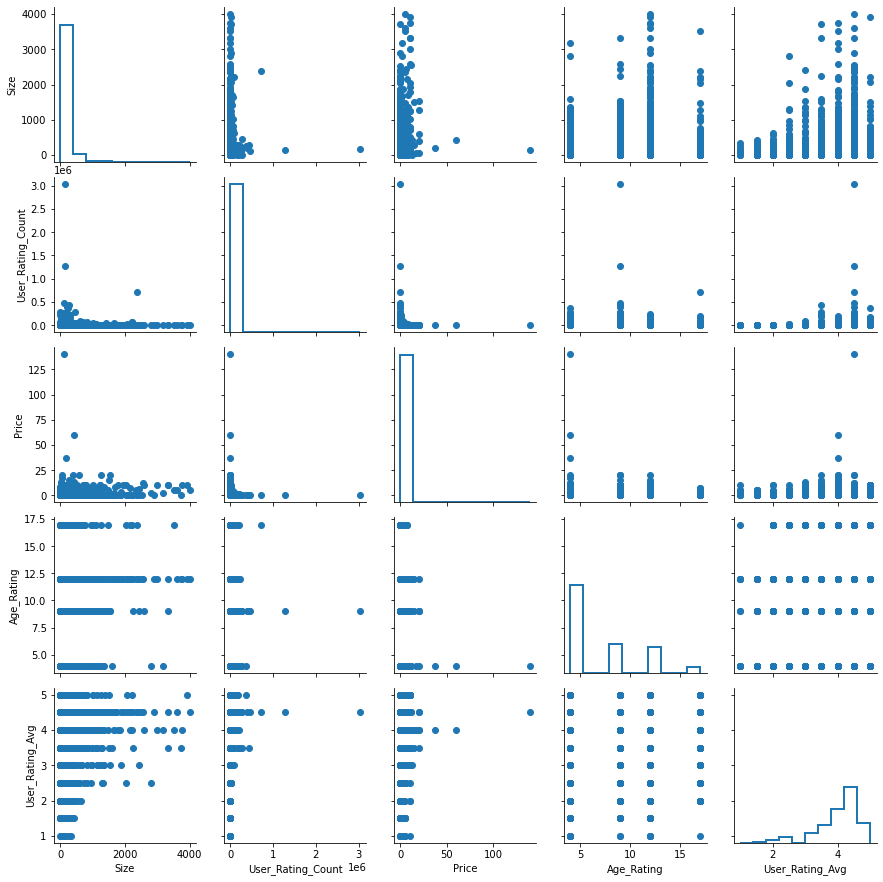

In [258]:
g = sns.PairGrid(df.loc[:,["Size","User_Rating_Count","Price","Age_Rating","User_Rating_Avg"]])
g.map_diag(plt.hist, histtype="step", linewidth=2)
g.map_offdiag(plt.scatter)

### 10. Correlation matrix

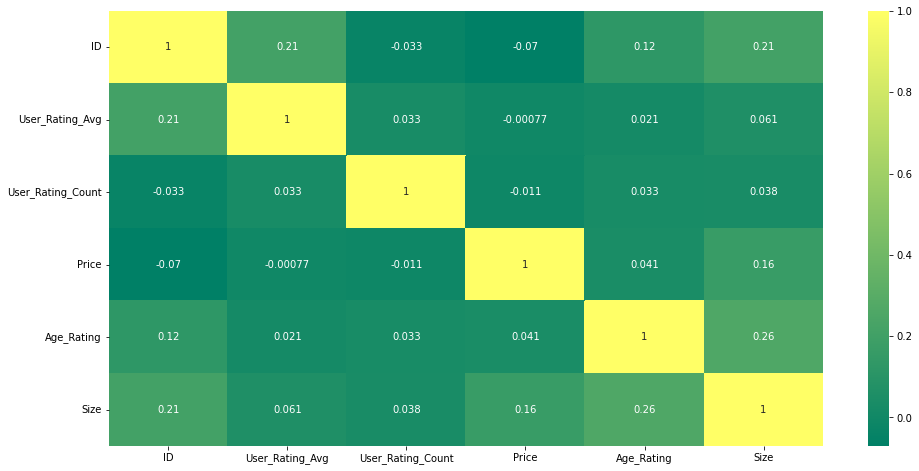

In [255]:
#Plot correlation matrix
df_corr=df.drop(['ID','URL', 'Name','Developer','Subtitle','Icon_Url','Description','Languages',
                 'Primary_Genre','Genres','Original_Release_Date','Current_Release_Date'],axis = 1)
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap = 'summer')
plt.show()

The heatmap provides clearer insight about the correlation between each variables in the model. In this case, Age Rating and Size have the highest correlation by 0.26. In the same time, Price have negative corraltion with Average User Rating and User Rating Count which tell us that when the price raise, the user rating countand average user rating can be decreased.

# III. Modelling

### 1. Cleaning and Processing Data for Modeling

In [169]:
#Replace and change type of Age Rating
df['Age_Rating'] = df['Age_Rating'].replace('4+','4')
df['Age_Rating'] = df['Age_Rating'].replace('9+','9')
df['Age_Rating'] = df['Age_Rating'].replace('12+','12')
df['Age_Rating'] = df['Age_Rating'].replace('17+','17')

In [170]:
df['Age_Rating']=pd.to_numeric(df['Age_Rating'])

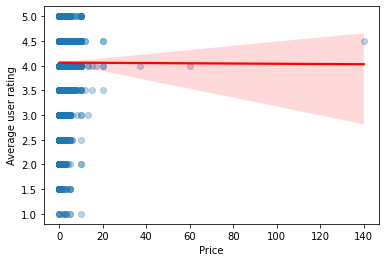

In [171]:
#Regression plot of Average User Rating and Price
ax= sns.regplot(y='User_Rating_Avg',x='Price',data= df,scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
ax.set_ylabel('Average user rating')
ax.set_xlabel('Price')
plt.title('')
plt.show()

There is a relationship between price and rating.It is clearly to see that most of the ratings are 4 points. The higher price of a game, the higher chance it gets lower rate on average.

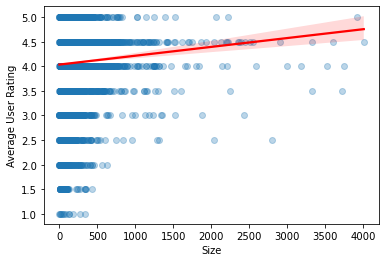

In [172]:
#Regression plot of Average User Rating and Size
ax = sns.regplot(x='Size',y='User_Rating_Avg',data = df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
ax.set_xlabel('Size')
ax.set_ylabel('Average User Rating')
plt.show()

The relationship between average user rating and size shows that when the size is bigger, the users have tendency to rate higher stars.

### 2. Classification - Logistic Regression Model

In [189]:
df1 = df.drop(['URL', 'Name','Developer','Subtitle','Icon_Url','In_App_Purchases','Description','Languages','Primary_Genre','Genres','Original_Release_Date','Current_Release_Date'], axis = 1)
#df1.isnull().sum()
#df1.dtypes

In [190]:
df1.describe()

,ID,User_Rating_Avg,User_Rating_Count,Price,Age_Rating,Size
count,7488.00,7488.00,7488.00,7488.00,7488.00,7488.00
mean,944327343.82,4.06,3306.24,0.57,6.88,151.57
std,333571894.64,0.75,42515.78,2.42,3.78,255.95
min,284921427.00,1.00,5.00,0.00,4.00,0.20
25%,646307145.75,3.50,12.00,0.00,4.00,30.50
50%,980002724.50,4.50,46.00,0.00,4.00,79.30
75%,1211851404.00,4.50,307.25,0.00,9.00,177.22
max,1474461379.00,5.00,3032734.00,139.99,17.00,4005.60


In [191]:
df1['User_Rating_Avg'].unique()

array([4. , 3.5, 3. , 2.5, 2. , 4.5, 1.5, 5. , 1. ])

In [192]:
df1['User_Rating_Avg'] = np.where(df1['User_Rating_Avg'] == 5, "1", df1['User_Rating_Avg'])
df1['User_Rating_Avg'] = np.where(df1['User_Rating_Avg'] == 4.5, "1", df1['User_Rating_Avg'])
df1['User_Rating_Avg'] = np.where(df1['User_Rating_Avg'] == 4, "1", df1['User_Rating_Avg'])

df1['User_Rating_Avg'] = np.where(df1['User_Rating_Avg'] == 3.5, "0", df1['User_Rating_Avg'])
df1['User_Rating_Avg'] = np.where(df1['User_Rating_Avg'] == 3, "0", df1['User_Rating_Avg'])
df1['User_Rating_Avg'] = np.where(df1['User_Rating_Avg'] == 2.5, "0", df1['User_Rating_Avg'])
df1['User_Rating_Avg'] = np.where(df1['User_Rating_Avg'] == 2, "0", df1['User_Rating_Avg'])
df1['User_Rating_Avg'] = np.where(df1['User_Rating_Avg'] == 1.5, "0", df1['User_Rating_Avg'])
df1['User_Rating_Avg'] = np.where(df1['User_Rating_Avg'] == 1, "0", df1['User_Rating_Avg'])

In [193]:
df1.head(3)

,ID,User_Rating_Avg,User_Rating_Count,Price,Age_Rating,Size,Original_Release_Year,Current_Release_Year
0,284921427,4.0,3553.00,2.99,4,15.90,2008,2017
1,284926400,3.5,284.00,1.99,4,12.30,2008,2018
2,284946595,3.0,8376.00,0.00,4,0.70,2008,2017


In [259]:
# features
X = df1.iloc[:, 1:-1].to_numpy() 
# target
y = df1.iloc[:, 1].to_numpy()   

We are now ready for the modelisation phase. First we need to split our data into two subsets :

    - the train set to fit the models.
    
    - the test set to evaluate the models.

In [195]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

In [196]:
# import library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [197]:
#Build Logistic model
model = LogisticRegression()

In [198]:
#Train the model
model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

accuracy_score(y_test, model.predict(x_test))

0.3733867378727192

Accuracy score: Overall model score on training sets.

y_test = 0, y_predict = 0 => True Negative (TN)

y_test = 1, y_predict = 0 => False Negative (FN)

y_test = 0, y_predict = 1 => False Positive (FP)

y_test = 1, y_predict = 1 => True Positive (TP)

accuracy_score = (TN + TP)/(TN + FN + FP + TP)

In [200]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_new = sc.fit_transform(x_train)
x_test_new = sc.transform(x_test)

In [201]:
#Revised model
##Train the model
revised_model = LogisticRegression()
revised_model.fit(x_train_new, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

accuracy_score(y_test, revised_model.predict(x_test_new))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9701824655095683

In [202]:
#Calculate Accuracy and Cofustion Matrix
#  combine predictions and target_test
predictions = revised_model.predict(x_test_new)
out_compare = pd.DataFrame([y_test,predictions]).T
out_compare.columns = ['y_test','predictions']
out_compare

,y_test,predictions
0,4.0,4.0
1,4.5,4.5
2,4.0,4.0
3,4.0,4.0
4,3.0,3.0
...,...,...
2242,4.5,4.5
2243,4.0,4.0
2244,4.5,4.5
2245,1,1


The output of out_compare shows the true positive accuracy of the model since values of y_test equal to values of y_prediction.

In [ ]:
References:
Image Module, https://pillow.readthedocs.io/en/5.1.x/reference/Image.html
Famargar, 'How to adjust transparency (alpha) in seaborn pairplot?', retrieved from: https://www.javaer101.com/en/article/1762322.html
Kimberly Fessel, 'Seaborn regplot | What is a regplot and how to make a regression plot in Python Seaborn?', retrieved from:
https://www.youtube.com/watch?v=Smh7ujDbYyg&ab_channel=KimberlyFessel
